In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime

1) Log file is loaded

In [3]:
file = open("log.txt", "r") 
lines = file.readlines()
for l in range(3): print(lines[l][:-1])

156.15.13.173 [01/Jan/2018:11:13:49 +0100] "GET AddProduct.html HTTP/1.0" 200 2356
176.247.135.49 [01/Jan/2018:11:18:07 +0100] "GET Shop.html HTTP/1.0" 200 7466
176.247.135.49 [01/Jan/2018:11:19:05 +0100] "GET AddProduct.html HTTP/1.0" 200 2356


2) Cass "Request" parses and keeps data of a single requests. Complete the TODO, where a given "line" (string) should be parsed in order to dervie the ip of the host making the request, time of the request (in seconds), and target page (name).

In [25]:
class Request:
    def __init__(self, line):
        # TODO DO PARSING HERE
        line = line.replace("[","")
        line = line.replace("]","")
        args = line.split(" ")
        self.ip = args[0]
        date = args[1].split(":")
        # convert hours + minutes + seconds -> total number of seconds
        self.time =int(date[1]) *60 *60 +int(date[2])*60 + int(date[3])
        self.page = args[4]
        
    def __repr__(self):
        return self.ip + "     " +  str(datetime.timedelta(seconds=self.time)) + " -> " + self.page


3) Each line of log.txt is parsed and the Request objects are added to the list

In [26]:
reqs = [Request(line) for line in lines]
for l in range(10): print(reqs[l]) 

156.15.13.173     11:13:49 -> AddProduct.html
176.247.135.49     11:18:07 -> Shop.html
176.247.135.49     11:19:05 -> AddProduct.html
176.247.135.49     11:29:05 -> Summary.html
69.84.30.199     11:43:59 -> Shop.html
69.84.30.199     11:45:16 -> AddProduct.html
57.116.45.120     11:46:45 -> AddProduct.html
69.84.30.199     11:50:36 -> Summary.html
69.84.30.199     11:52:38 -> Payment.html
26.19.183.202     11:53:11 -> AddProduct.html


# Exercise

Your task is to analyze the log file. You should indentify the users and sessions. Then, compute the following: <br>
3.1) the number of sessions (should be 1000 :) ), <br>
3.2) the number of users, <br>
3.3) the average number of sessions per one user <br>
3.4) use the distribution plot to visualize the sessions' lengths (minutes);  <br>
3.5) use the distribution plot to visualize the sessions' lengths (the number of requests) <br>
3.6) use the distribution plot to visualize sessions' starting times (hours). <br>
3.7) which web page is the most common entry point?; for each page plot the number of times it has been an entry page,  <br>
3.8) which web page is the most common departure point?; for each page plot the number of times the user stopped a session while being on this page, <br>
3.9) for each page plot the average time the user stayed on this page <br>
3.10) print the fist 10 sessions (paths). <br>

You may find the following classes helpful and data.

In [27]:
class Session:
    def __init__(self):
        self.startTime = 0
        self.stopTime = 0
        self.requests = []
        
    def __repr__(self):
        print("SESSION")
        print(self.startTime)
        print(self.stopTime)
        STR = ""
        for r in self.requests:
            print(r)
            STR += ("  " + r.page + "    " + str(datetime.timedelta(seconds=r.time)) + "\n")
        return STR

class Computer:
    def __init__(self):
        self.ip = []
        self.sessions = []
    def __repr__(self):
        return self.ip

PAGES = ["Shop.html", "AddProduct.html", "Summary.html", "Payment.html","About.html", "Contact.html"]

LINKS = [[1, 4],
         [2,4],
         [3],
         [],
         [1,5],
         []]

#plot distribution
#count, bins, ignored = plt.hist(data, 50, alpha=0.5, normed=True)
#plt.plot()

#x_axis = np.arange(len(pages))
#plt.bar(x_axis, data, align='center', alpha=0.5)
#plt.xticks(y_pos, pages, rotation=90)

In [88]:
sessions = []
computers = []
ips = list(set([r.ip for r in reqs]))
for ip in ips:
    wasHisSess =False
    comp =Computer()
    comp.ip = ip
    reqInSess = []
    fTime = None
    lastTime = None
    for r in reqs:
        if(r.ip == ip):
            if(fTime is None ):
                fTime = r.time
            if(wasHisSess ==True):
                reqInSess.append(r)
                lastTime = r.time
            else:
                beginTime = str(datetime.timedelta(seconds = fTime) )
                endTime = str(datetime.timedelta(seconds =r.time))
                bT = datetime.datetime.strptime(beginTime, "%H:%M:%S")
                eT = datetime.datetime.strptime(endTime, "%H:%M:%S")
                if(abs((eT - bT).total_seconds()/60) > 10):
                    reqInSess.append(r)
                    lastTime = None
                    sess = Session()
                    sess.requests = reqInSess
                    sess.startTime =fTime
                    sess.stopTime =r.time
                    comp.sessions.append(sess)
                    sessions.append(sess)
                    fTime = None
                    reqInSess=[]
                else:
                    reqInSess.append(r)
                    lastTime = r.time
                wasHisSess =True
        else:
            wasHisSess = False
    computers.append(comp)
sessCount = len(sessions)
print("Sessions: "+str(sessCount))
print("Users: "+str(len(ips)))
print("Average of session per one user: "+str(sessCount/float(len(ips))))

Sessions: 706
Users: 391
Average of session per one user: 1.8056265984654731


[]

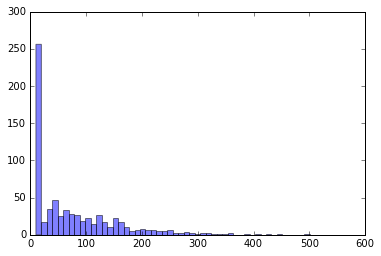

In [80]:
timeStamps = []
for s in sessions:
    bTime =s.startTime
    eTime = s.stopTime
    beginTime = str(datetime.timedelta(seconds = bTime) )
    endTime = str(datetime.timedelta(seconds =eTime))
    bT = datetime.datetime.strptime(beginTime, "%H:%M:%S")
    eT = datetime.datetime.strptime(endTime, "%H:%M:%S")
    l = abs((eT - bT).total_seconds()/60)
    timeStamps.append(l)
count, bins, ignored = plt.hist(timeStamps, 50, alpha=0.5, normed=False)
plt.plot()

[]

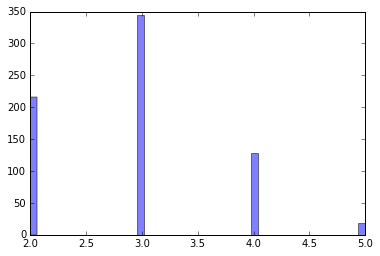

In [81]:
sessionLenghts = []
for s in sessions:
    sessionLenghts.append(len(s.requests))
count, bins, ignored = plt.hist(sessionLenghts, 50, alpha=0.5, normed=False)
plt.plot()